<a href="https://colab.research.google.com/github/Arhin-Eben/Machine-learning-with-python/blob/master/AUC_ROC_Curve_W3schools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AUC - ROC Curve**

Imbalanced Data

In [4]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

n = 10000
ratio = .95
n_0 = int((1 - ratio) * n)
n_1 = int(ratio * n)

y = np.array([0] * n_0 + [1] * n_1)

# below are the probabilities obtained from a hypothetical model that always predicts the majority class
# probability of predicting class 1 is going to be 100%
y_proba = np.array([1] * n)
y_pred = y_proba > 0.5

print(f'accuracy score: {accuracy_score(y, y_pred)}')
cf_mat = confusion_matrix(y, y_pred)
print(f'Confusion Matrix: \n{cf_mat}')
print(f'class 0 accuracy: {cf_mat[0, 0] / (cf_mat[0, 0] + cf_mat[0, 1])}')
print(f'class 1 accuracy: {cf_mat[1, 1] / (cf_mat[1, 0] + cf_mat[1, 1])}')

accuracy score: 0.95
Confusion Matrix: 
[[   0  500]
 [   0 9500]]
class 0 accuracy: 0.0
class 1 accuracy: 1.0


In [5]:
# below are the probabilities obtained from a hypothetical model that doesn't always predict the mode
y_proba_2 = np.array(np.random.uniform(0, .7,n_0).tolist() +
                     np.random.uniform(0.3, 1, n_1).tolist())
y_pred_2 = y_proba_2 > 0.5

print(f'accuracy score: {accuracy_score(y, y_pred_2)}')
cf_mat_2 = confusion_matrix(y, y_pred_2)
print(f'Confusion Matrix: \n{cf_mat}')
print(f'class 0 accuracy: {cf_mat[0][0]/n_0}')
print(f'class 1 accuracy: {cf_mat[1][1]/n_1}')


accuracy score: 0.7121
Confusion Matrix: 
[[   0  500]
 [   0 9500]]
class 0 accuracy: 0.0
class 1 accuracy: 1.0


In [6]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
  """
plots thr ROC curve based of the probabilities
  """
  fpr, tpr, thresholds = roc_curve(true_y, y_prob)
  plt.plot(fpr, tpr)

  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')

Example
Model 1:

model 1 AUC score: 0.5


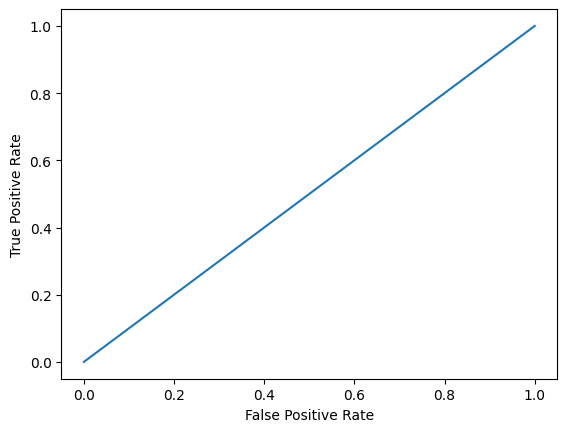

In [7]:
plot_roc_curve(y, y_proba)
print(f'model 1 AUC score: {roc_auc_score(y, y_proba)}')

model 1 AUC score: 0.5

Example
Model 2:

model 2 AUC score: 0.8163202105263158


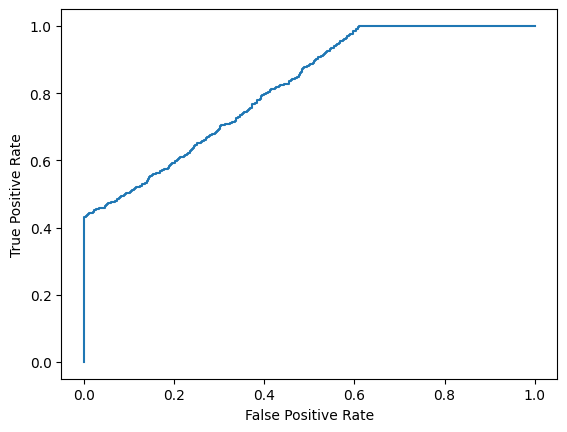

In [8]:
plot_roc_curve(y, y_proba_2)
print(f'model 2 AUC score: {roc_auc_score(y, y_proba_2)}')

model 2 AUC score: 0.8270551578947367

Probabilities

In [10]:
import numpy as np

n = 10000
y = np.array([0] * n + [1] * n)

#
y_prob_1 = np.array(
    np.random.uniform(0.25, 0.5, n//2).tolist() +
    np.random.uniform(0.3, 0.7, n).tolist() +
    np.random.uniform(0.5, 0.75, n//2).tolist()
)

y_prob_2 = np.array(
    np.random.uniform(0, 0.4, n//2).tolist() +
    np.random.uniform(0.3, 0.7, n).tolist() +
    np.random.uniform(0.6, 1, n//2).tolist()
)

print(f'model 1 accuracy score: {accuracy_score(y, y_prob_1 > 0.5)}')
print(f'model 2 accuracy score: {accuracy_score(y, y_prob_2 > 0.5)}')

print(f'model 1 AUC score: {roc_auc_score(y, y_prob_1)}')
print(f'model 2 AUC score: {roc_auc_score(y, y_prob_2)}')

model 1 accuracy score: 0.7514
model 2 accuracy score: 0.75055
model 1 AUC score: 0.77647466
model 2 AUC score: 0.85893084


Example
Plot model 1:

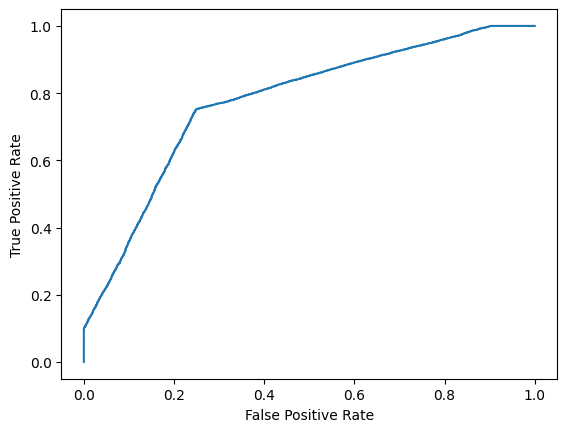

In [11]:
plot_roc_curve(y, y_prob_1)

Example
Plot model 2:

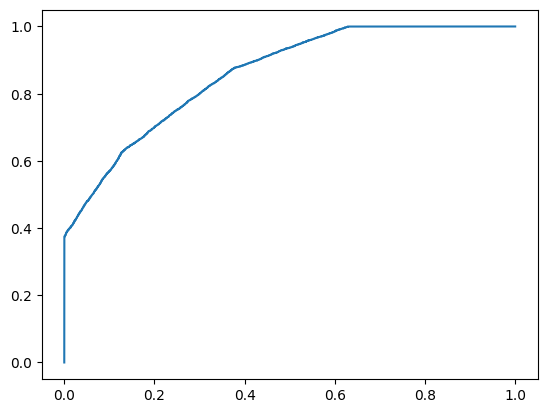

In [12]:
fpr, tpr, thresholds = roc_curve(y, y_prob_2)
plt.plot(fpr, tpr)